# B117 In Detail

In [1]:
from dl import queryClient as qc
import numpy as np
from astropy.table import Table
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from gala.coordinates import MagellanicStreamNidever08
from dlnpyutils import coords
import pandas as pd
from astropy.io import fits
import os
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

# Gaia Data

In [2]:
cenra = 16.05
cendec = -73.25527777777778

In [3]:
gaia = Table.read('./2nd/Bica08/B117_gaiadr3.fits')

gaia


b,dec,ecl_lat,ecl_lon,l,parallax,phot_bp_mean_flux,phot_g_mean_flux,phot_rp_mean_flux,pmdec,pmra,ra,ref_epoch,solution_id,source_id,random_index,htm9,nest4096,ring256,logg_gspphot,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_sigma5d_max,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,bp_g,bp_rp,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,dec_pseudocolour_corr,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,g_rp,grvs_mag,grvs_mag_error,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,nu_eff_used_in_astrometry,parallax_error,parallax_over_error,parallax_pmdec_corr,parallax_pmra_corr,parallax_pseudocolour_corr,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_bp_rp_excess_factor,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,pm,pmdec_error,pmdec_pseudocolour_corr,pmra_error,pmra_pmdec_corr,pmra_pseudocolour_corr,pseudocolour,pseudocolour_error,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,ra_pseudocolour_corr,radial_velocity,radial_velocity_error,ruwe,rv_chisq_pvalue,rv_expected_sig_to_noise,rv_renormalised_gof,rvs_spec_sig_to_noise,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_quasar,classprob_dsc_combmod_star,random_id,rv_amplitude_robust,rv_template_fe_h,rv_template_logg,rv_template_teff,rv_time_duration,vbroad,vbroad_error,astrometric_matched_transits,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,duplicated_source,grvs_mag_nb_transits,matched_transits,matched_transits_removed,new_matched_transits,non_single_star,phot_bp_n_blended_transits,phot_bp_n_contaminated_transits,phot_bp_n_obs,phot_g_n_obs,phot_rp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_obs,rv_atm_param_origin,rv_nb_deblended_transits,rv_nb_transits,rv_visibility_periods_used,vbroad_nb_transits,visibility_periods_used,astrometric_primary_flag,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,has_rvs,has_xp_continuous,has_xp_sampled,in_andromeda_survey,in_galaxy_candidates,in_qso_candidates,designation,libname_gspphot,phot_variable_flag,astrometric_params_solved,ipd_frac_multi_peak,ipd_frac_odd_win,phot_proc_mode,rv_method_used
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,bytes28,bytes7,bytes13,int64,int64,int64,int64,int64
-43.75501913338686,-73.34470189455934,-65.5368717513747,311.731133780

# On-Sky Density

Text(0.5, 1.0, 'B117 on-sky Density')

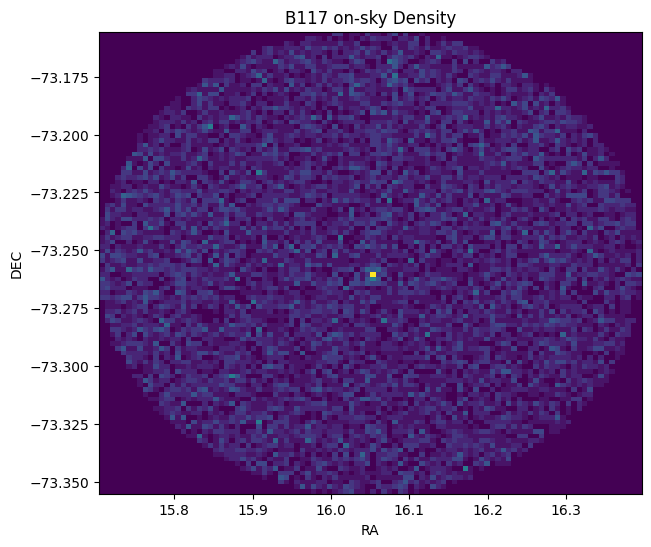

In [4]:
# On-sky plot
fig = plt.figure(figsize=(7,6))
o=plt.hist2d(gaia['ra'],gaia['dec'],bins=(100,100))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('B117 on-sky Density')

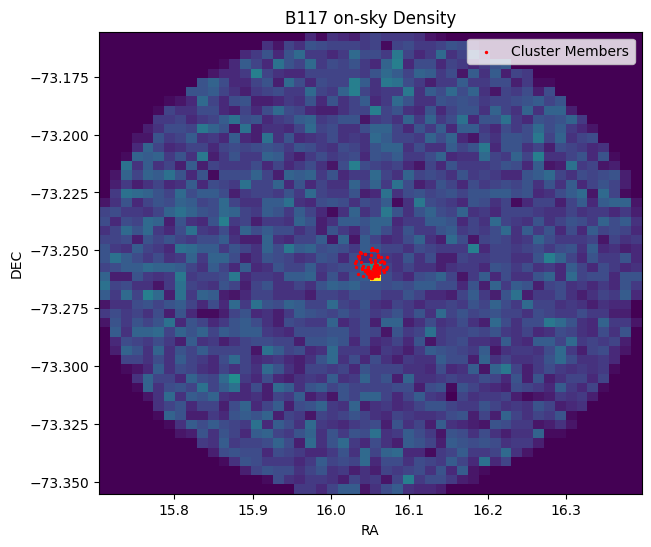

In [5]:
# On-sky plot
fig = plt.figure(figsize=(7,6))
o=plt.hist2d(gaia['ra'],gaia['dec'],bins=(50, 50))
rad = coords.sphdist(cenra,cendec,gaia['ra'],gaia['dec'])
gaia['rad'] = rad
ind1, = np.where(rad < 0.4/60.0)
ind2 = np.where(rad >= 0.4/60.0)
cluster = gaia[ind1]
back = gaia[ind2]
plt.scatter(cluster['ra'],cluster['dec'],s=2,c='r',label='Cluster Members')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('B117 on-sky Density')
plt.legend()    

# CMD

Text(0.5, 1.0, 'B117 Color Magnitude Diagram')

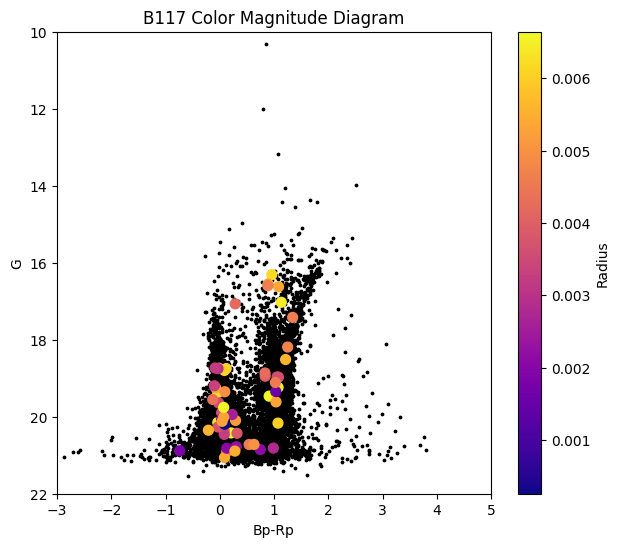

In [6]:
# CMD
fig = plt.figure(figsize=(7,6))
plt.scatter(back['bp_rp'],back['phot_g_mean_mag'],s=3,c='black')
plt.scatter(cluster['bp_rp'],cluster['phot_g_mean_mag'],c=cluster['rad'],s=50,cmap='plasma')
plt.xlim(-3,5)
plt.ylim(22,10)
plt.colorbar(label='Radius')
plt.xlabel('Bp-Rp')
plt.ylabel('G')
plt.title('B117 Color Magnitude Diagram')

# Proper Motion Diagram

Text(0.5, 1.0, 'B117 Proper Motion Diagram')

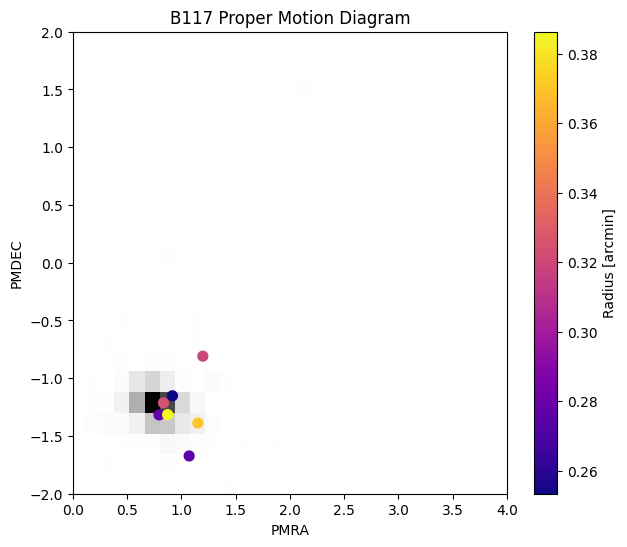

In [7]:
# Proper Motion
fig = plt.figure(figsize=(7,6))

xr = [0,4]
yr = [-2,2]
bbright, = np.where(back['phot_g_mean_mag'] < 17.5)
o=plt.hist2d(back['pmra'][bbright],back['pmdec'][bbright],bins=50,range=[[-2,5],[-4,5]],cmap='Greys')
cbright, = np.where(cluster['phot_g_mean_mag'] < 17.5)
plt.scatter(cluster['pmra'][cbright],cluster['pmdec'][cbright],c=cluster['rad'][cbright]*60,s=50,cmap='plasma')
plt.colorbar(label='Radius [arcmin]')
plt.xlim(xr[0],xr[1])
plt.ylim(yr[0],yr[1])
plt.xlabel('PMRA')
plt.ylabel('PMDEC')
plt.title('B117 Proper Motion Diagram')